# Machine Learning 2
# Classification

   Age  Gender  Polyuria  ...  Alopecia  Obesity  class
0   40     1.0       0.0  ...       1.0      1.0    1.0
1   58     1.0       0.0  ...       1.0      0.0    1.0
2   41     1.0       1.0  ...       1.0      0.0    1.0
3   45     1.0       0.0  ...       0.0      0.0    1.0
4   60     1.0       1.0  ...       1.0      1.0    1.0

[5 rows x 17 columns]
Age                     int64
Gender                float64
Polyuria              float64
Polydipsia            float64
sudden weight loss    float64
weakness              float64
Polyphagia            float64
Genital thrush        float64
visual blurring       float64
Itching               float64
Irritability          float64
delayed healing       float64
partial paresis       float64
muscle stiffness      float64
Alopecia              float64
Obesity               float64
class                 float64
dtype: object
Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.

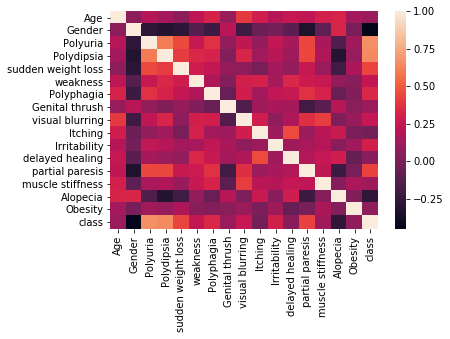

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

df = pd.read_csv('diabetes_data_upload.csv')
df.head()
col = df.columns
oe = OrdinalEncoder()

for i in range(1,len(col)):
    c = col[i]
    df[[c]] = oe.fit_transform(df[[c]])
print(df.head())
print(df.dtypes)

cr = df.corr()
sns.heatmap(cr)
print(cr['class'])

In [29]:
X = df.drop(columns=['class'])
Y = df['class']
models = [GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
modelnames = ['N.Bayes', 'SVM', 'Tree','KNN']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

for i in range(0,len(models)):
    print('------------------------------------------------------------------------------')
    print("Train and Test model ", modelnames[i])
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Positive', 'Negativce']))
    print('------------------------------------------------------------------------------')

    

------------------------------------------------------------------------------
Train and Test model  N.Bayes
[[47  7]
 [ 7 95]]
              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87        54
   Negativce       0.93      0.93      0.93       102

    accuracy                           0.91       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.91      0.91      0.91       156

------------------------------------------------------------------------------
------------------------------------------------------------------------------
Train and Test model  SVM
[[50  4]
 [ 4 98]]
              precision    recall  f1-score   support

    Positive       0.93      0.93      0.93        54
   Negativce       0.96      0.96      0.96       102

    accuracy                           0.95       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.95      0.95      0.95       156

---------------

/home/anwar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


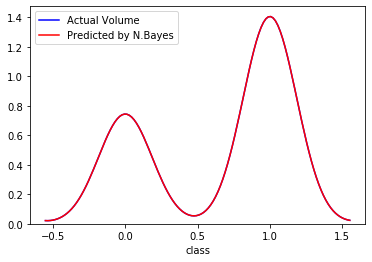

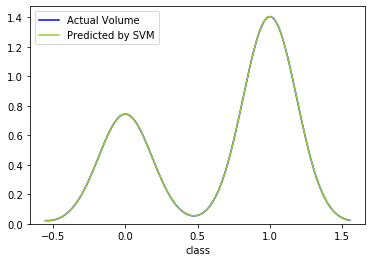

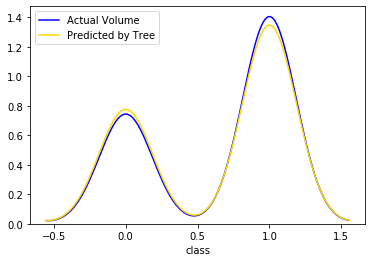

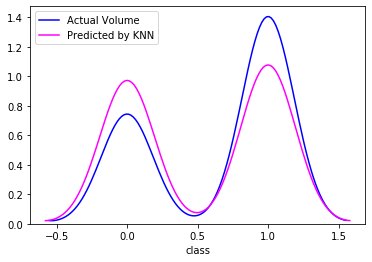

In [30]:
colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    ax1 = sns.distplot(y_test, hist=False, color='b', label='Actual Volume')
    sns.distplot(models[i].predict(X_test), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)
    plt.show()